In [1]:
%matplotlib notebook

import os

from PIL import Image, ExifTags, ImageEnhance, ImageFilter
from pyzbar.pyzbar import decode
import zbarlight

import numpy as np
from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm

from skimage import io, util, color
from skimage.transform import rotate
from skimage.filters import threshold_otsu, threshold_local

In [2]:
def get_exif(file_name):
    with open(file_name, 'rb') as image_file:
        img = Image.open(image_file)
        exif = {ExifTags.TAGS[k]: v
                for k, v in img._getexif().items()
                if k in ExifTags.TAGS}
    return exif

In [3]:
def window_slider(
        image_width,
        image_height,
        window_width=400,
        window_height=400,
        stride_width=200,
        stride_height=200):

    for top in range(0, image_height, stride_height):
        bottom = top + window_height
        bottom = image_height if bottom > image_height else bottom

        for left in range(0, image_width, stride_width):
            right = left + window_width
            right = image_width if right > image_width else right

            box = (left, top, right, bottom)

            yield box

In [4]:
image_path = '../data/test/R0000008.JPG'

In [5]:
exif = get_exif(image_path)
print(exif['DateTime'])

2015:01:01 14:07:17


In [6]:
image = Image.open(image_path)
print(image.size)

(4928, 3264)


<IPython.core.display.Javascript object>


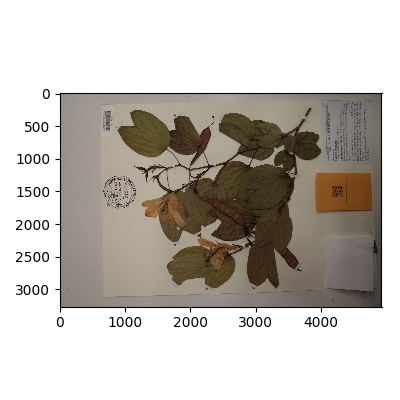

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(image)

plt.tight_layout()
plt.show()

In [8]:
slider = window_slider(image.size[0], image.size[1])
print(slider)

<generator object window_slider at 0x7f7ba6eb6ba0>


In [9]:
for box in slider:
    if box == (600, 200, 1000, 600):
        print(box)
        cropped = image.crop(box).rotate(-90)
        # cropped = image[box[1]:box[3], box[0]:box[2]]
        break

(600, 200, 1000, 600)


<IPython.core.display.Javascript object>


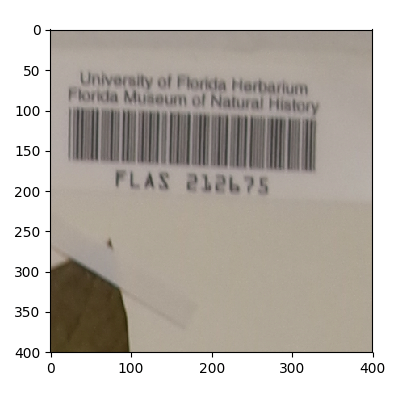

In [10]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cropped, cmap=plt.cm.gray)

plt.tight_layout()
plt.show()

In [13]:
sharpened = cropped.filter(ImageFilter.SHARPEN)
# sharpened = sharpened.filter(ImageFilter.SHARPEN)

<IPython.core.display.Javascript object>


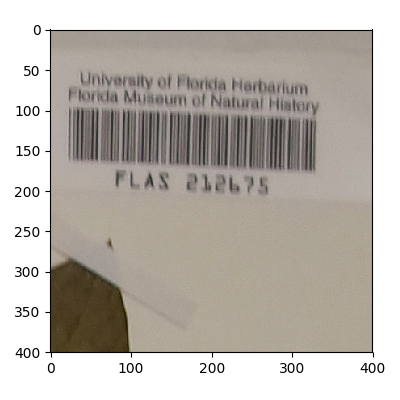

In [14]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(sharpened, cmap=plt.cm.gray)

plt.tight_layout()
plt.show()

In [15]:
qr = decode(sharpened)
print(qr)

[]


In [16]:
qr = zbarlight.scan_codes('qrcode', sharpened)
print(qr)

None
